<a href="https://colab.research.google.com/github/slds-lmu/lecture_sl/blob/main/exercises/information-theory-quarto/inserted/sol_information_theory_1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1.b
Sample points according to the true distribution and visualize the KLD for different parameter settings of
the Gaussian distribution (including the optimal one if available)

## Sampling from a Binomial Distribution

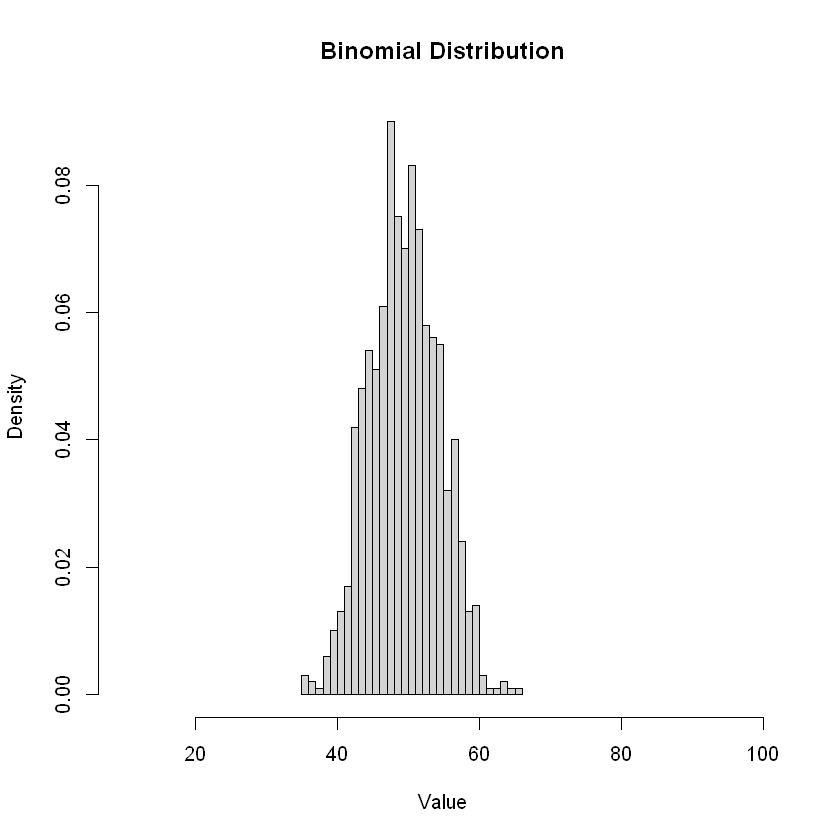

In [1]:
#| label: sampling_binomial

num_points = 1000 # number of points to sample
n = 100 		  # number of trials
p = 0.5 		  # probability of success

set.seed(42) # fixing the seed for reproducibility

# sampling from a binomial distribution
X <- rbinom(num_points, prob = p, size = n)

# plotting 
xlim_from <- 10 
xlim_to <- 100 
num_breaks <- 25

hist(X, breaks = 25, xlim = c(xlim_from, xlim_to), freq = FALSE,
	main = "Binomial Distribution",
	xlab = "Value", ylab = "Density")

## Various Gaussian distributions

In [ ]:
#| label: defining_densities
true_exp <- n * p 
true_variance <- n * p * (1 - p) 
true_sd <- sqrt(true_variance) 

# define different Normal density functions
normal_optimal <- function(x) dnorm(x, mean = true_exp, sd = true_sd)
normal_shift_left <- function(x) dnorm(x, mean = true_exp - 10, sd = true_sd)
normal_scale_increase <- function(x) dnorm(x, mean = true_exp, sd = true_sd*2)
normal_shift_right_scale_decrease <- function(x) dnorm(x, mean = true_exp + 20, sd = p*(1-p))


### Plotting

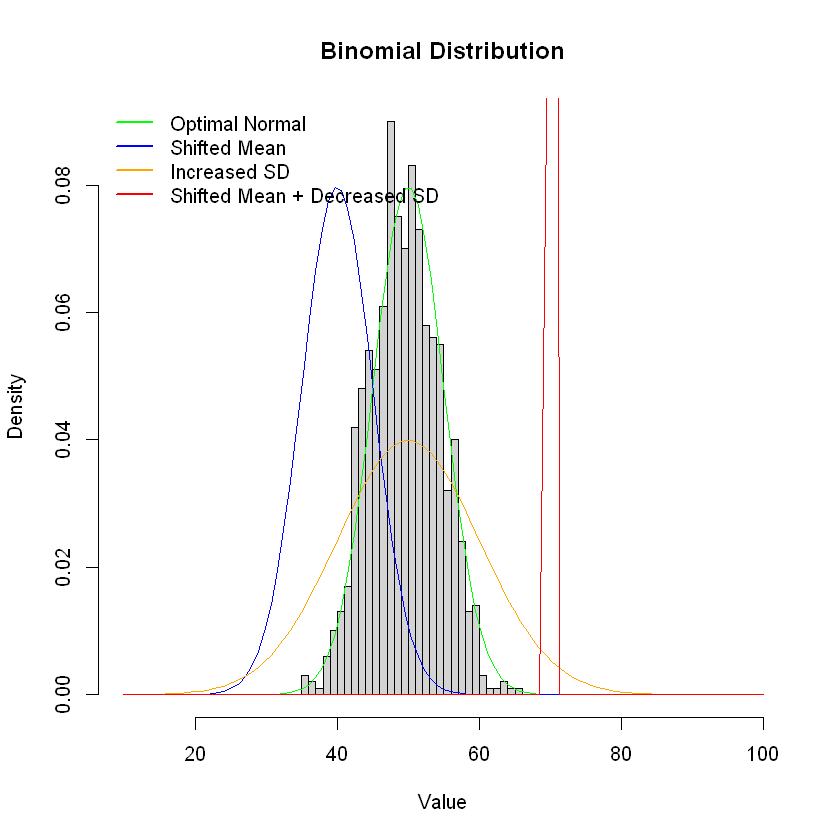

In [3]:
#| label: plotting
hist(X, breaks = num_breaks, xlim = c(xlim_from, xlim_to), freq = FALSE,
	main = "Binomial Distribution",
	xlab = "Value", ylab = "Density")

curve(normal_optimal, from = xlim_from, to = xlim_to, add = TRUE, col = "green")
curve(normal_shift_left, from = xlim_from, to = xlim_to, add = TRUE, col = "blue")
curve(normal_scale_increase, from = xlim_from, to = xlim_to, add = TRUE, col = "orange")
curve(normal_shift_right_scale_decrease, from = xlim_from, to = xlim_to, add = TRUE, col = "red")

# hope a bit of overlap with the red curves label is not a big deal :-)
legend("topleft",
	legend = c("Optimal Normal", "Shifted Mean", "Increased SD", "Shifted Mean + Decreased SD"),
	col = c("green", "blue", "orange", "red"),
	lwd = 2,
	bty = "n")

## KL divergence values
For these distributions, we get the following KL divergence values (up to an additive constant):

$$
D_{KL}(f||q) = c_3 + 0.5 \log \sigma^2 + \frac{1}{2\sigma^2} (\text{Var}_f(X) + (np-\mu)^2))
$$

In [4]:
#| label: kld_value
kld_value <- function(mu, sigma2)
{
	0.5 * log(sigma2) + 
    0.5 * (sigma2)^(-1) * (true_variance + (true_exp - mu)^2)
}

optimal_green <- kld_value(true_exp, true_variance)
cat("Optimal Normal (green):", optimal_green, "\n")

shift_blue <- kld_value(true_exp - 10, true_variance)
cat("Shifted Mean (blue):", shift_blue, "\n")

scale_increase_orange <- kld_value(true_exp, true_variance * 4)
cat("Increased SD (orange):", scale_increase_orange, "\n")

right_scale_decrease_red <- kld_value(true_exp + 20, (p * (1 - p))^2)
cat("Shifted Mean + Decreased SD (red):", right_scale_decrease_red, "\n")


Optimal Normal (green): 2.109438 
Shifted Mean (blue): 4.109438 
Increased SD (orange): 2.427585 
Shifted Mean + Decreased SD (red): 3398.614 


## Conclusion
KL divergence values let us see how badly we have specified the distribution. Optimally specified Gaussian produced the lowest value. Changing the mean and/or variance resulted in an increased KL divergence values

# Exercise 1.c
Since we are now required to calculate the exact KLD values, we would also have to calculate $\mathbb{E}_f(\log f(X))$, which is somewhat more difficult. If you search the internet for a solution ($\rightarrow$ "entropy of a binomial distribution"), you will find an approximate solution using the de-Moivre-Laplace theorem. Alternatively, we could make use of the central limit theorem, but then we would just approximate $f$ with a normal distribution with $\mu = np$ and $\sigma^2 = np(1-p)$, which would give us a constant KLD of zero (the very same happens if you use the first approximation using the de-Moivre-Laplace-theorem). We here instead will approximate the expectation using a large sample from the true underlying distribution:
$$
D_{KL}(f||q) \approx \frac{1}{B} \sum_{b=1}^B [\log f(X) - \log q(X|\mu = np, \sigma^2 = np(1-p))]
$$

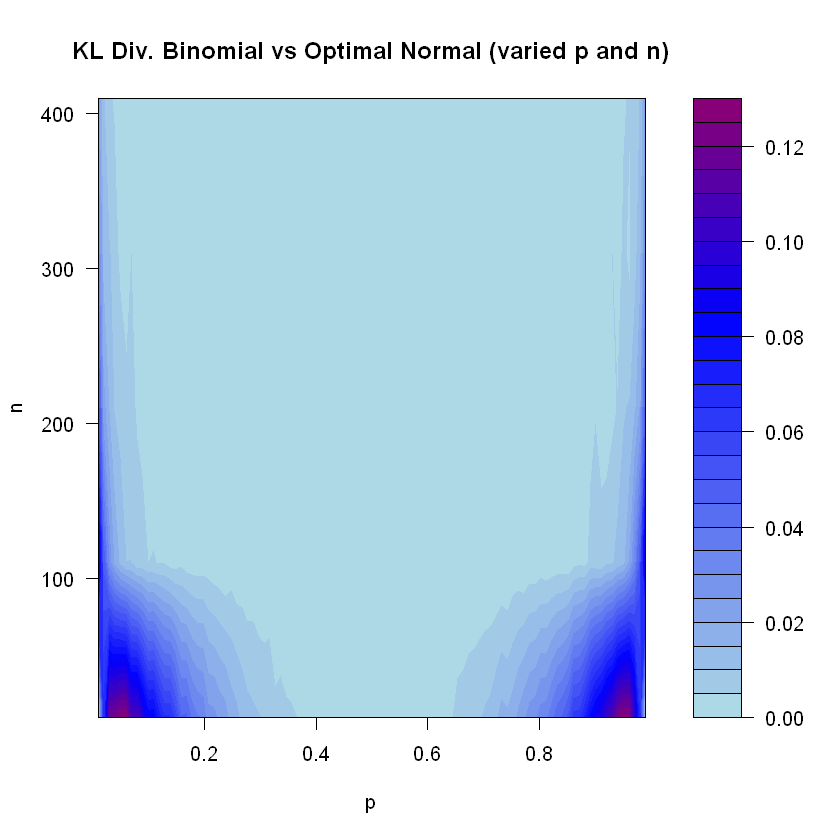

In [5]:
#| label: kld_value_varied_p_n
p_seq <- seq(0.01, 0.99, l = 100)
n_seq <- seq(10, 500, by = 100)
B <- 10000

kld_value_approx <- function(n,p){ 
	# sample a large number of data points from true distribution
	x <- rbinom(B, prob = p, size = n)
  
	# approximate the mean; threshold values to 0 if < 0 due
	# to the approximation
	pmax(
		mean(
			dbinom(x, prob = p, size = n, log = TRUE) - 
			dnorm(x, mean = n*p, sd = sqrt(n*p*(1-p)), log = TRUE),
			na.rm = TRUE
		),
	0)
}

kld_val <- sapply(n_seq, function(this_n) 
	sapply(p_seq, function(this_p) kld_value_approx(this_n, this_p)))

cols = rev(colorRampPalette(c('darkred','red','blue','lightblue'))(50))

filled.contour(
	x = p_seq, y = n_seq, z = kld_val, 
	xlab = "p", ylab = "n", 
	col = cols,
	main = "KL Div. Binomial vs Optimal Normal (varied p and n)"
)
